## Введение в анализ данных, ИАД-6

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил(а): Орлов Евгений

### Общая информация

__Дата выдачи:__ 06.02.2020

__Дедлайн:__ 17.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}}) + \min(2, s_{\text{matplotlib}})\right) \times 10 / 23,
$$

где $s_{\text{numpy}}$, $s_{\text{pandas}}$ и $s_{\text{matplotlib}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. За каждые 2 задачи сверх обязательных (9 в первой части, 12 во второй и 2 в третьей) идет балл в бонус. Таким образом, за это домашнее задание можно получить 2 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл от оценки в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

Необходимое, но не достаточное условие для успешного выполнения этой части — вам необходимо пройти все `assert`'ы.

In [3]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес проверочных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [16]:
def result_mark(weights: np.array, marks: np.array) -> int:
    return round(sum(weights * marks))

In [17]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [18]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, которая принимает на вход два целочисленных массива одинаковой длины, и возвращает минимальный и максимальный из тех элементов этих двух массивов у которых совпадает и позиция и значение (то есть из всех элементов $\{a[i]: a[i] = b[i]\}$). Например, для `a = np.array([4, 2, 6, 3])` и `b = np.array([4, 3, 6, -3])` ответом является кортеж `(4, 6)`.

In [19]:
def minMaxEqual(a: np.array, b: np.array) -> tuple:
    return min(a[a == b]), max(a[a == b])

In [20]:
a = np.array([4, 2, 6, 3])
b = np.array([4, 3, 6, -3])

assert minMaxEqual(a, b) == (4, 6)

In [21]:
a = np.array([0, 0, 0, 0, 0])
b = np.array([0, 0, 0, 0, 0])

assert minMaxEqual(a, b) == (0, 0)

In [22]:
a = np.array([-1, -1, -1, 1, 0])
b = np.array([1, -1, 1, 1, 0])

assert minMaxEqual(a, b) == (-1, 1)

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [23]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    ab = array1 - array2
    ab = np.where(abs(ab) < precision)[0]
    print(ab)
    return ab

In [24]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

[0 1 3 6]


In [25]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

[1 3]


### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [26]:
def block_matrix(block: np.array) -> np.array:
    print(np.tile(block, (2, 2)))
    return np.tile(block, (2, 2))

In [27]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

[[1 3 3 1 3 3]
 [7 0 0 7 0 0]
 [1 3 3 1 3 3]
 [7 0 0 7 0 0]]


### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [28]:
def diag_prod(matrix: np.array):
    diag = matrix.diagonal()
    diag = diag[diag != 0]
    diag = diag.prod()
    return diag

In [29]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [30]:
def normalize(matrix: np.array) -> np.array:
    def x(axis):
        axis = (axis - np.mean(axis)) / np.std(axis)
        return axis
    matrix = np.apply_along_axis(x, 0, matrix)
    return matrix

In [31]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [32]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [33]:
def make_symmetric(matrix: np.array) -> np.array:
    W = np.triu(matrix) + np.tril(matrix.T, -1)
    print(W)
    return W

In [34]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

[[ 1  2  3  4]
 [ 2  5  6  7]
 [ 3  6  8  9]
 [ 4  7  9 10]]


In [35]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

[[10 21 32 49]
 [21 53 62 78]
 [32 62 82 92]
 [49 78 92 10]]


### 8

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [36]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    tile = np.arange(a, b+1)
    print(tile)
    output = np.tile(tile, (m, 1))
    print(output)
    return output

In [37]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

[ 3  4  5  6  7  8  9 10]
[[ 3  4  5  6  7  8  9 10]
 [ 3  4  5  6  7  8  9 10]
 [ 3  4  5  6  7  8  9 10]
 [ 3  4  5  6  7  8  9 10]
 [ 3  4  5  6  7  8  9 10]]


In [38]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

[2 3 4 5 6]
[[2 3 4 5 6]
 [2 3 4 5 6]
 [2 3 4 5 6]]


### 9

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [39]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    output = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    print(output)
    
    return output

In [40]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

-0.25


In [41]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

-0.11992905704375506


### 10

Напишите функцию, которая принимает параметры `lims: ndarray размера 2`, `k: float`, `b: float`, `n: int`, `noise_level: float` и возвращает выборку из n объектов, сгенерированную по правилу `y_i = k*x_i + b + U[-noise_level; noise_level]`. Где каждый x_i генерируется равномерно из `U[lims[0]; lims[1]]` (U[a, b] — равномерное распределение на [a, b]). Функция должна возвращать кортеж, первым элементом которого будет массив x, и вторым элементом массив y — значения функции в точках этого массива.

In [76]:
# К сожалению, не до конца понял задание, поэтому назначил значение шума случайным из равномерного распределения

def gen_data(lims: np.array, k: float, b: int, n: int, noise_level: float):
    noise = np.random.choice(np.linspace(-noise_level, noise_level, num=n), n)
    x = np.linspace(lims[0], lims[1], num=n)
    y = k * x + b + noise
    
    return x, y

In [77]:
gen_data((-1, 1), 2, 0, 20,  1e-1)

(array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
        -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
         0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
         0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ]),
 array([-2.1       , -1.81578947, -1.51052632, -1.37368421, -1.16315789,
        -0.88947368, -0.79473684, -0.51052632, -0.3       , -0.12105263,
         0.16315789,  0.32105263,  0.47894737,  0.67894737,  0.97368421,
         1.13157895,  1.38421053,  1.5       ,  1.78421053,  2.07894737]))

In [44]:
# Выход должен выглядеть примерно так

gen_data((-1, 1), 2, 0, 20,  1e-1)

(array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
        -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
         0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
         0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ]),
 array([-2.1       , -1.88947368, -1.67894737, -1.46842105, -1.25789474,
        -1.04736842, -0.83684211, -0.62631579, -0.41578947, -0.20526316,
         0.00526316,  0.21578947,  0.42631579,  0.63684211,  0.84736842,
         1.05789474,  1.26842105,  1.47894737,  1.68947368,  1.9       ]))

## Часть 2. Pandas

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [46]:
pass_data = pd.read_csv('train.csv')
pass_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

PassengerId - порядковый, Survived - бинарный, Pclass - порядковый, Name - категориальный, Sex - бинарный, Age - количественный, SibSp - количественный, Parch - количественный, Ticket - категориальный, Fare - количественный, Cabin - категориальный, Embarked - категориальный

Задача регрессии - восстановить зависимость количества детей от стоимости билета
Задача классификации - определить, выжил пассажир или нет (бинарная классификация)
Задача кластеризации - выделение классов благосостояния по стоимости билета, количеству детей и факту выживания после кораблекрушения

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [47]:
survived = pass_data['Survived'].mean()
print(f'Доля выживших: {survived}')
print('Доля мужчин и женщин среди выживших:')
pass_data.groupby('Sex')['Survived'].mean()

Доля выживших: 0.3838383838383838
Доля мужчин и женщин среди выживших:


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [48]:
print(pass_data['Pclass'].value_counts())
pass_data[pass_data['Pclass'] == 3]['Sex'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64


male      347
female    144
Name: Sex, dtype: int64

### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

Минимальная стоимость: 0.0
Средняя стоимость: 32.204207968574636
Максимальная стоимость: 512.3292

Минимальная стоимость в Саутгемптоне: 0.0
Средняя стоимость в Саутгемптоне: 27.079811801242233
Максимальная стоимость в Саутгемптоне: 263.0


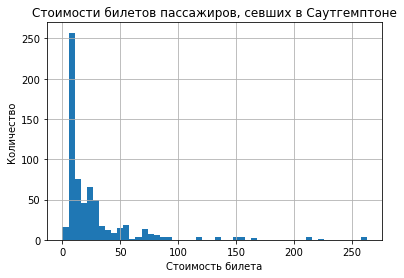

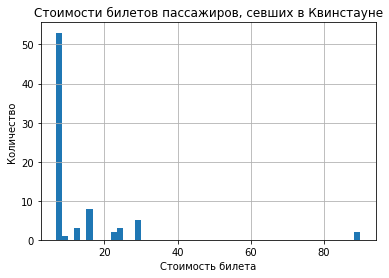

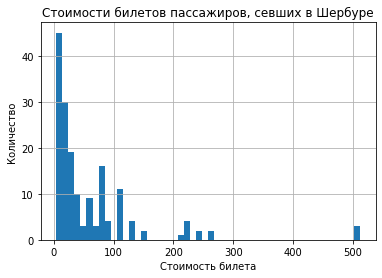

In [49]:
output = pass_data['Fare'].min()
print(f'Минимальная стоимость: {output}')
output = pass_data['Fare'].mean()
print(f'Средняя стоимость: {output}')
output = pass_data['Fare'].max()      
print(f'Максимальная стоимость: {output}')

print()
output = pass_data[pass_data['Embarked'] == 'S']['Fare'].min()
print(f'Минимальная стоимость в Саутгемптоне: {output}')
output = pass_data[pass_data['Embarked'] == 'S']['Fare'].mean()
print(f'Средняя стоимость в Саутгемптоне: {output}')
output = pass_data[pass_data['Embarked'] == 'S']['Fare'].max()      
print(f'Максимальная стоимость в Саутгемптоне: {output}')

pass_data[pass_data.Embarked == 'S'].Fare.hist(bins=50)
plt.title('Стоимости билетов пассажиров, севших в Саутгемптоне')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество')
plt.show()

pass_data[pass_data.Embarked == 'Q'].Fare.hist(bins=50)
plt.title('Стоимости билетов пассажиров, севших в Квинстауне')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество')
plt.show()

pass_data[pass_data.Embarked == 'C'].Fare.hist(bins=50)
plt.title('Стоимости билетов пассажиров, севших в Шербуре')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество')
plt.show()

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

Номер билета и имя уникальны для каждого пассажира, поэтому не помогут сформировать какие-либо классы в выборке.

In [50]:
pass_data.drop('Name', axis=1, inplace=True)
pass_data.drop('Ticket', axis=1, inplace=True)
pass_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [51]:
pass_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [52]:
pass_data['Age'].fillna(0, inplace=True)
pass_data['Cabin'].fillna('None', inplace=True)
pass_data['Embarked'].fillna('None', inplace=True)
pass_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

           Age      Fare
Age   1.000000  0.135516
Fare  0.135516  1.000000


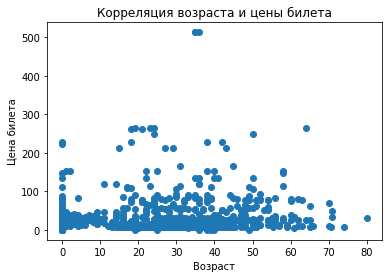

In [53]:
print(pass_data[['Age', 'Fare']].corr(method='pearson'))
plt.plot(pass_data['Age'], pass_data['Fare'],'o')
plt.title('Корреляция возраста и цены билета')
plt.xlabel('Возраст')
plt.ylabel('Цена билета')
plt.show()

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса? А от места посадки?

In [54]:
print(pass_data[pass_data['Fare'] < 10]['Survived'].mean())
print(pass_data[(pass_data['Fare'] >= 10) & (pass_data['Fare'] < 50)]['Survived'].mean())
print(pass_data[(pass_data['Fare'] >= 50) & (pass_data['Fare'] < 100)]['Survived'].mean())
print(pass_data[(pass_data['Fare'] >= 100) & (pass_data['Fare'] < 150)]['Survived'].mean())
print(pass_data[(pass_data['Fare'] >= 150) & (pass_data['Fare'] < 500)]['Survived'].mean())

print()
print(pass_data.groupby('Pclass')['Survived'].mean())
print()
print(pass_data.groupby('Embarked')['Survived'].mean())

0.19940476190476192
0.4213197969543147
0.6481481481481481
0.7916666666666666
0.6538461538461539

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Embarked
C       0.553571
None    1.000000
Q       0.389610
S       0.336957
Name: Survived, dtype: float64


### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [55]:
relatives = pass_data['SibSp'] + pass_data['Parch'] + 1
pass_data['Relatives'] = relatives
pass_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Relatives
0,1,0,3,male,22.0,1,0,7.2500,None,S,2
1,2,1,1,female,38.0,1,0,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,7.9250,None,S,1
3,4,1,1,female,35.0,1,0,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,8.0500,None,S,1


In [56]:
# Добавим в таблицу частное цены билета и класса. Так вес привилегированных классов будет еще больше.

fare_and_pclass = pass_data['Fare'] / pass_data['Pclass']
pass_data['FareAndPclass'] = fare_and_pclass
pass_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Relatives,FareAndPclass
0,1,0,3,male,22.0,1,0,7.2500,None,S,2,2.416667
1,2,1,1,female,38.0,1,0,71.2833,C85,C,2,71.283300
2,3,1,3,female,26.0,0,0,7.9250,None,S,1,2.641667
3,4,1,1,female,35.0,1,0,53.1000,C123,S,2,53.100000
4,5,0,3,male,35.0,0,0,8.0500,None,S,1,2.683333


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [57]:
# Сколько лет было самому старому выжившему мужчине и самой старой выжившей женщине?

print(pass_data[pass_data['Survived'] == 1].groupby('Sex')['Age'].max())

Sex
female    63.0
male      80.0
Name: Age, dtype: float64


### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

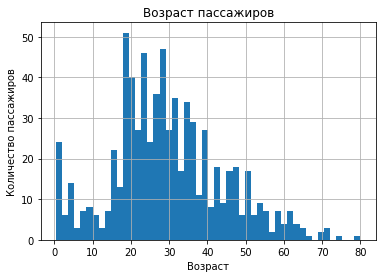

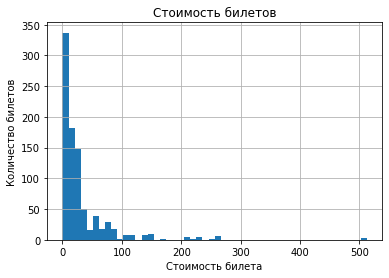

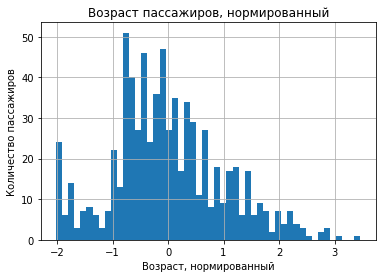

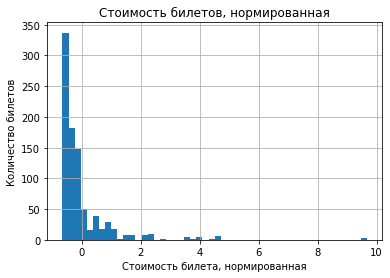

In [58]:
pass_data[pass_data['Age'] != 0]['Age'].hist(bins=50)
plt.title('Возраст пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.show()

pass_data['Fare'].hist(bins=50)
plt.title('Стоимость билетов')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество билетов')
plt.show()

# Плохо то, что признаки имеют разную, несопоставимую размерность и очень по-разному будут влиять на модель.

fare_normalized = pd.Series(normalize(pass_data['Fare'].to_numpy()))
pass_data['FareNormalized'] = fare_normalized

age_normalized = pd.Series(normalize(pass_data[pass_data['Age'] != 0]['Age'].to_numpy()))
pass_data['AgeNormalized'] = age_normalized

pass_data['AgeNormalized'].hist(bins=50)
plt.title('Возраст пассажиров, нормированный')
plt.xlabel('Возраст, нормированный')
plt.ylabel('Количество пассажиров')
plt.show()

pass_data['FareNormalized'].hist(bins=50)
plt.title('Стоимость билетов, нормированная')
plt.xlabel('Стоимость билета, нормированная')
plt.ylabel('Количество билетов')
plt.show()

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [59]:
print(pass_data['Cabin'].unique())
# Первая буква поля Cabin обозначает палубу. В случаях, когда в одной записи присутствует несколько палуб, записываем
# только верхнюю: считаем, что каждый пассажир воспользовался шансом спастись с более верхней палубы, если он был.

pass_data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
pass_data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
pass_data['Cabin'] = pass_data['Cabin'].str[:1]

['None' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78'
 'D33' 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26'
 'C110' 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7'
 'C49' 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87'
 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26'
 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124'
 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44'
 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20'
 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101'
 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48'
 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24'
 'C90' 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3'
 'D6' 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24'
 'C50' 'B42' 'C148']


In [60]:
pass_data['Cabin'].replace(['N', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], [0, 1, 2, 3, 4, 5, 6, 7, 8], inplace=True)

In [61]:
pass_data.rename(columns={'Cabin': 'Deck'}, inplace=True)
pass_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Deck,Embarked,Relatives,FareAndPclass,FareNormalized,AgeNormalized
0,1,0,3,0,22.0,1,0,7.2500,0,0,2,2.416667,-0.502445,-0.530377
1,2,1,1,1,38.0,1,0,71.2833,3,1,2,71.283300,0.786845,0.571831
2,3,1,3,1,26.0,0,0,7.9250,0,0,1,2.641667,-0.488854,-0.254825
3,4,1,1,1,35.0,1,0,53.1000,3,0,2,53.100000,0.420730,0.365167
4,5,0,3,0,35.0,0,0,8.0500,0,0,1,2.683333,-0.486337,0.365167


## Часть 3. Matplotlib

### 25

Отобразите гистограмму распределения возрастов для каждого класса пассажиров (здесь опять нужно использовать данные из заданий по pandas). В результате вы должны получить три гистограммы, которые необходимо отобразить рядом друг с другом используя функцию plt.subplots. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры figsize, sharey, sharex функции plt.subplots. Также полезными могут оказаться параметры bins, normed функции plt.hist

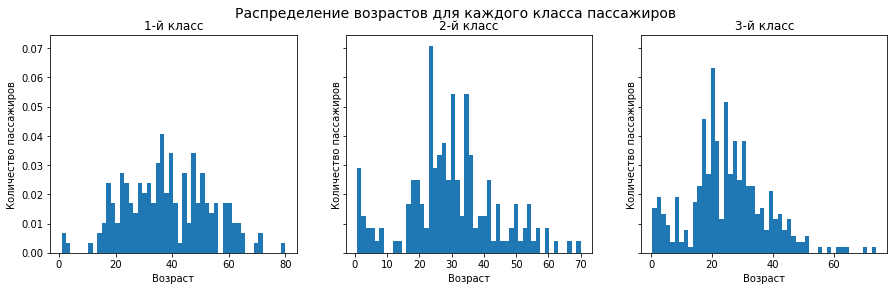

In [98]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15, 4))
fig.suptitle('Распределение возрастов для каждого класса пассажиров', fontsize=14)

ax[0].hist(pass_data[(pass_data['Pclass'] == 1) & (pass_data['Age'] != 0)]['Age'], bins=50, density=True)
ax[0].set_ylabel('Количество пассажиров')
ax[0].set_xlabel('Возраст')
ax[0].set_title('1-й класс')

ax[1].hist(pass_data[(pass_data['Pclass'] == 2) & (pass_data['Age'] != 0)]['Age'], bins=50, density=True)
ax[1].set_ylabel('Количество пассажиров')
ax[1].set_xlabel('Возраст')
ax[1].set_title('2-й класс')

ax[2].hist(pass_data[(pass_data['Pclass'] == 3) & (pass_data['Age'] != 0)]['Age'], bins=50, density=True)
ax[2].set_ylabel('Количество пассажиров')
ax[2].set_xlabel('Возраст')
ax[2].set_title('3-й класс');

### 26

Нарисуйте график косинуса для `x` от `-1` до `5`. 

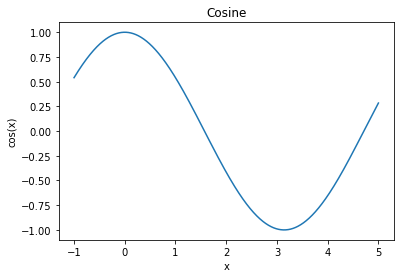

In [108]:
x = np.linspace(-1, 5, 1000)

plt.plot(x, np.cos(x))
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.title('Cosine')

plt.show()

### 27

Используя функцию из задания №10 по numpy (gen_data), отобразите на графике сгенерированную выборку, а также настоящую прямую из которой выборка была получена. Добавьте на этот график прямую, которая приближает выборку, обучив для этого простейшую линейную регрессию. Чтобы получить параметры данной прямой, можно выполнить следующий код:

        from sklearn.linear_model import LinearRegression as LR

        data_x, data_y = gen_data(...)
        regr = LR()
        regr.fit(data_x, data_y)
        k_learned, b_learned = regr.coef_, regr.intercept_

[[-1.        ]
 [-0.89473684]
 [-0.78947368]
 [-0.68421053]
 [-0.57894737]
 [-0.47368421]
 [-0.36842105]
 [-0.26315789]
 [-0.15789474]
 [-0.05263158]
 [ 0.05263158]
 [ 0.15789474]
 [ 0.26315789]
 [ 0.36842105]
 [ 0.47368421]
 [ 0.57894737]
 [ 0.68421053]
 [ 0.78947368]
 [ 0.89473684]
 [ 1.        ]]


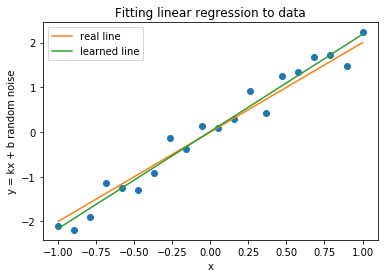

In [127]:
sample = gen_data((-1, 1), 2, 0, 20, 4e-1)

x = sample[0]
y = sample[1]

from sklearn.linear_model import LinearRegression as LR

regr = LR()
regr.fit(x[:, np.newaxis], y)
k_learned, b_learned = regr.coef_, regr.intercept_
print(x[:, np.newaxis])

plt.plot(x, y, 'o')
plt.plot(x, 2 * x, label='real line')
plt.plot(x, k_learned * x + b_learned, label='learned line')
plt.xlabel('x')
plt.ylabel('y = kx + b random noise')
plt.title('Fitting linear regression to data')
plt.legend()
plt.show()